In [9]:
import gym
import gym_pogs

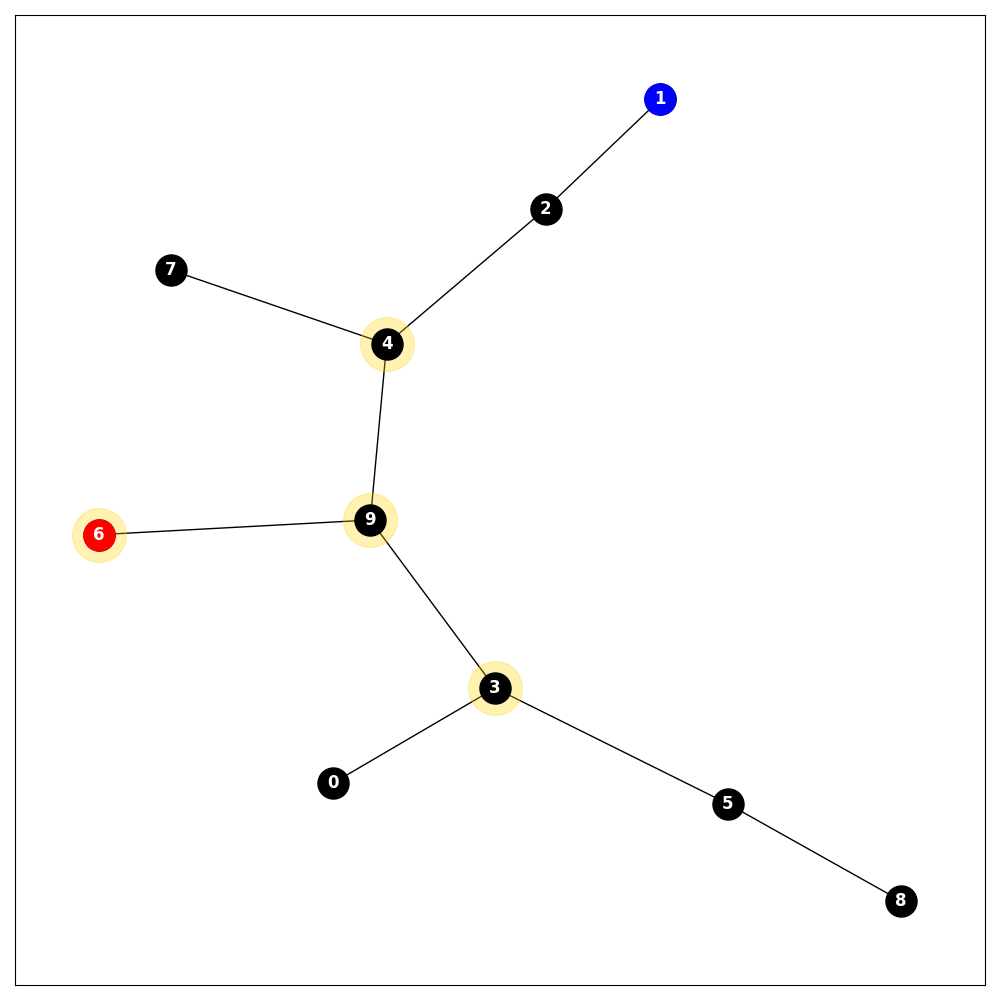

In [10]:
env = gym.make("POGS-v0", num_nodes=10, k_nearest=2)
env.seed(12)
obs = env.reset()

env.render()

In [11]:
obs

{'vector': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 6., 1.],
       dtype=float32),
 'current_node': np.int64(6),
 'target_node': np.int64(1),
 'edge_list': {(3, 9), (4, 9), (6, 9), (9, 3), (9, 4), (9, 6)}}

In [12]:
vec, current, target, edge_list = obs.values()

In [13]:
current, target 

(np.int64(6), np.int64(1))

In [14]:
edge_list

{(3, 9), (4, 9), (6, 9), (9, 3), (9, 4), (9, 6)}